In [60]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import svm #Import svm model
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

In [10]:
data = pd.read_csv('heart.csv')

In [11]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [12]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [13]:
#Display basic info about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [14]:
#Separate Feature and Target Matrix
x = data.drop('target',axis = 1) 
y = data.target

In [ ]:
# Model Training

In [15]:
# Split dataset into training set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=109) # 70% training and 30% test

In [37]:
#Create a svm Classifier
ml = svm.SVC(kernel='linear') # Linear Kernel

ml.fit(x_train, y_train)
y_pred = ml.predict(x_test)
y_pred


array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,

In [38]:
y_test

297    0
215    1
224    1
912    0
361    1
      ..
513    0
494    1
168    1
911    0
279    1
Name: target, Length: 308, dtype: int64

In [17]:
ml.score(x_test,y_test)

0.8733766233766234

In [ ]:
# Confusion Matrix

<AxesSubplot:>

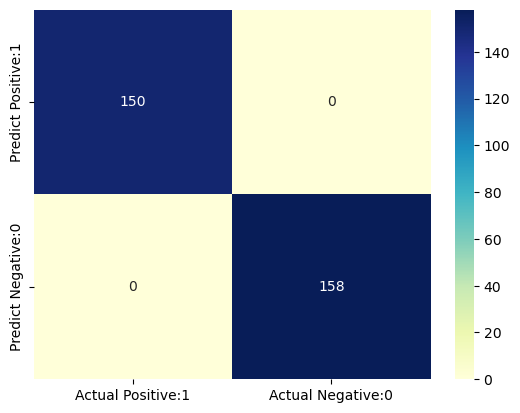

In [18]:
import seaborn as sns

cm = confusion_matrix(y_test, y_test)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [42]:
f1_lr = f1_score(y_test, y_pred, average='weighted')
print(f1_lr)

0.8730105242077961


In [43]:
accuracy_mlp = accuracy_score(y_test, y_pred, normalize=True)
print(accuracy_mlp)

0.8733766233766234


In [44]:
roc_mlp = roc_auc_score(y_test, y_pred, average='macro')
print(roc_mlp)

0.8721940928270042


In [53]:
# --- SVM Parameters ---
parameter_svc = [
    {'svc__kernel': ['rbf'], 'svc__gamma': np.arange(0.1, 1, 0.1), 'svc__C': np.arange(0.1, 1, 0.1)},
    {'svc__kernel': ['linear'], 'svc__C': np.arange(0.1, 1, 0.1)},
    {'svc__kernel': ['poly'], 'svc__degree': np.arange(1, 10, 1), 'svc__C': np.arange(0.1, 1, 0.1)}
]

# --- SVM Algorithm ---
algo_svc = SVC(random_state=1, probability=True)

# --- SVM Pipeline (if needed) ---
# Assuming there is a pipeline that contains the 'svc' step.
pipeline_svc = Pipeline([('svc', algo_svc)])

# --- Applying SVM with GridSearchCV ---
grid_search_svc = GridSearchCV(estimator=pipeline_svc, param_grid=parameter_svc, scoring='accuracy', cv=5)

# Fit the model
grid_search_svc.fit(x_train, y_train)

# Best parameters and best score
best_params_svc = grid_search_svc.best_params_
best_score_svc = grid_search_svc.best_score_

# Accuracy on train and test sets
acc_score_train_svc = grid_search_svc.score(x_train, y_train)
acc_score_test_svc = grid_search_svc.score(x_test, y_test)

# Print the results
print(f"Best Parameters for SVC: {best_params_svc}")
print(f"Training Accuracy: {acc_score_train_svc:.2f}")
print(f"Test Accuracy: {acc_score_test_svc:.2f}")
print(f"Best Cross-Validation Score: {best_score_svc:.2f}")

print(f"Best Parameters: {best_params}")




Best Parameters for SVC: {'svc__C': 0.30000000000000004, 'svc__gamma': 0.1, 'svc__kernel': 'rbf'}
Training Accuracy: 1.00
Test Accuracy: 0.98
Best Cross-Validation Score: 0.94


In [63]:
# Best parameters obtained from Grid Search
best_params = {'C': 0.30000000000000004, 'gamma': 0.1, 'kernel': 'rbf'}

# Train a new SVM model with the best hyperparameters
best_model = SVC(
    C=best_params['C'], 
    gamma=best_params['gamma'], 
    kernel=best_params['kernel'],
    random_state=42,  # Ensuring reproducibility
    probability=True  # If you need probability estimates
)

# Fit the model on the training data
best_model.fit(x_train, y_train)

# Make predictions on the test data
y_pred_best = best_model.predict(x_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred_best)
print(f"Accuracy of the SVM model with tuned hyperparameters: {accuracy * 100:.2f}%")

Accuracy of the SVM model with tuned hyperparameters: 97.73%


In [62]:
# --- SVM Parameters ---
parameter_svc = [
    {'svc__kernel': ['rbf'], 'svc__gamma': np.arange(0.1, 1, 0.1), 'svc__C': np.arange(0.1, 1, 0.1)},
    {'svc__kernel': ['linear'], 'svc__C': np.arange(0.1, 1, 0.1)},
    {'svc__kernel': ['poly'], 'svc__degree': np.arange(1, 10, 1), 'svc__C': np.arange(0.1, 1, 0.1)}
]

# --- SVM Algorithm ---
algo_svc = SVC(random_state=1, probability=True)

# --- SVM Pipeline ---
pipeline_svc = Pipeline([('svc', algo_svc)])

# --- Applying SVM with RandomizedSearchCV ---
# n_iter defines the number of random combinations to try
random_search_svc = RandomizedSearchCV(estimator=pipeline_svc, param_distributions=parameter_svc, 
                                       scoring='accuracy', cv=5, n_iter=10, random_state=42)

# Fit the model
random_search_svc.fit(x_train, y_train)

# Best parameters and best score
best_params_svc = random_search_svc.best_params_
best_score_svc = random_search_svc.best_score_

# Accuracy on train and test sets
acc_score_train_svc = random_search_svc.score(x_train, y_train)
acc_score_test_svc = random_search_svc.score(x_test, y_test)

# Print the results
print(f"Best Parameters for SVC: {best_params_svc}")
print(f"Training Accuracy: {acc_score_train_svc:.2f}")
print(f"Test Accuracy: {acc_score_test_svc:.2f}")
print(f"Best Cross-Validation Score: {best_score_svc:.2f}")

Best Parameters for SVC: {'svc__kernel': 'rbf', 'svc__gamma': 0.2, 'svc__C': 0.7000000000000001}
Training Accuracy: 1.00
Test Accuracy: 0.98
Best Cross-Validation Score: 0.94


In [66]:
# Best parameters obtained from Grid Search
best_params = {'C': 0.7000000000000001, 'gamma': 0.2, 'kernel': 'rbf'}

# Train a new SVM model with the best hyperparameters
best_model = SVC(
    C=best_params['C'], 
    gamma=best_params['gamma'], 
    kernel=best_params['kernel'],
    random_state=42,  # Ensuring reproducibility
    probability=True  # If you need probability estimates
)

# Fit the model on the training data
best_model.fit(x_train, y_train)

# Make predictions on the test data
y_pred_best = best_model.predict(x_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred_best)
print(f"Accuracy of the SVM model with tuned hyperparameters: {accuracy * 100:.2f}%")

Accuracy of the SVM model with tuned hyperparameters: 97.73%
